## DATA MINING ASSIGNMENT 2

DATE SUBMITTED:14/03/2018

Fashion-MNIST is a dataset comprising of 28 x 28 grayscale images of 70,000 fashion
products from 10 categories, with 7,000 images per category.

The training set has 60,000 images and the test set has 10,000 images.

### 1.Loading the datasets.
Here,I am using tensorflow to load the datasets(datasets downloaded from github that are already split into 4 files which 
contains 60k training set images,60k training set labels,10k testing set images and 10k testing set labels).

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('D:\data/fashion')

D:\Anaconda5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting D:\data/fashion\train-images-idx3-ubyte.gz
Extracting D:\data/fashion\train-labels-idx1-ubyte.gz
Extracting D:\data/fashion\t10k-images-idx3-ubyte.gz
Extracting D:\data/fashion\t10k-labels-idx1-ubyte.gz


Tensorflow input the data and automatically split another 5k data from the training set images and labels as the validation 
data. 
Therefore, I will be combining the 5k datasets into the 55k training set before I procceed as some of the part when I used to 
train the classifiers,the 5k validation data are not in used.After combining, the shape of the data was checked as below.

In [2]:
import numpy as np
a=data.train.labels
b=data.train.images
c=data.validation.labels
d=data.validation.images
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)
#combining the validation data and training data
trlabel=np.append(data.train.labels,data.validation.labels,axis=0)
trdata=np.append(data.train.images,data.validation.images,axis=0)
print(trlabel.shape)
print(trdata.shape)
testlabel=data.test.labels
testdata=data.test.images
print(testlabel.shape)
print(testdata.shape)
#whole data
sumdata=np.append(trdata,testdata,axis=0)
sumlabel=np.append(trlabel,testlabel,axis=0)
print(sumdata.shape)
print(sumlabel.shape)

(55000,)
(55000, 784)
(5000,)
(5000, 784)
(60000,)
(60000, 784)
(10000,)
(10000, 784)
(70000, 784)
(70000,)


### 2.Training Classifiers and Predicting Data
#### A. K-Nearest Neighbour Classifier
By using the combined training data of 60k records, we can train the K-nearest Neighbour classifier with the nearest 5 
neighbour,manhattan distance(p=1) and uniform weight.

In [3]:
x=trdata
y=trlabel
x_test=testdata
y_test=testlabel
from sklearn.neighbors import KNeighborsClassifier
##predicting and training using nearest 5 neighbour,manhattan distance and uniform weights
neigh=KNeighborsClassifier(n_neighbors=5,p=1)
neigh.fit(x,y)
predicted_output=neigh.predict(x_test)
###check how many correct
np.sum(y_test==predicted_output)
nb_Correct=np.sum(y_test==predicted_output)
####check the accuracy
print(nb_Correct/y_test.shape[0]*100)

86.22999999999999


Therfore the accuracy of the K-nearest neighbour classifier is 86.23%, it means that 86.23% of the testing data was correctly 
predicted and 13.77% of the data was wrongly predicted and it takes around 20 minutes to train the classifier.
To show which data are wrongly predicted, we are going to use the confusion matrix to visualize the prediction 
of the datasets for this model.

In [4]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predicted_output))

[[862   1  17  19   4   0  91   1   5   0]
 [  5 970   3  12   5   0   4   0   1   0]
 [ 19   0 812   9  83   0  76   0   1   0]
 [ 37   5  16 883  35   0  23   0   1   0]
 [  2   1 139  28 753   0  75   0   2   0]
 [  1   0   0   1   0 900   0  57   0  41]
 [195   0 130  20  79   0 566   0  10   0]
 [  0   0   0   0   0   5   0 955   0  40]
 [  2   1  11   4   5   2  15   9 951   0]
 [  0   0   0   0   0   0   0  28   1 971]]


From the confusion matrix,we can see that out of 10k of test data,8623 of it are predicted correctly and 1377 of it are predicted wrongly.From the 1k of T-shirt/top, 862 of it are predicted correctly but 1 of it are predicted as trouser,17 of it are predicted as pullover,19 of it are predicted as dress ,4 of it are predicted as coat and 91 of it are predicted as shirt ,1 of it are predicted as sneaker and 5 of it are predicted as bag.The accuracy for t-shirt/top to be predicted correctly is 86.2%,for trouser to be predicted correctly is 97.0%,for pullover to be predicted correctly is 81.2%,for dress to be predicted correctly is 88.3%,for coat to be predicted correctly is 75.3%,for sandal to be predicted correctly is 90.0%,for shirt to be predicted correctly is 56.6%, for sneaker to be predicted correctly is 95.5%,for bag to be predicted correctly is 95.1% and lastly for ankle boot to be predicted correctly is 97.1%.We can also check the percentage of error through the confusion matrix where 23.24% of the predicted data as t-shirt/top are predicted wrongly, means that the confidence of predicting t-shirt/top correctly on the predicted data that predicted as t-shirt/top is 76.76%.

#### B. SVM.SVC Classifier
By using the combined data of 60k records, 
we can train the SVC classifier with a parameter of error C=10, kernel of radial basis function(rbf).

In [5]:
x=trdata
y=trlabel
x_test=testdata
y_test=testlabel
from sklearn.svm import SVC
svc1=SVC(kernel='rbf', C= 10.0)
svc1.fit(x,y)
predicted_y=svc1.predict(x_test)
nb_Correct=np.sum(y_test==predicted_y)
print(nb_Correct/y_test.shape[0]*100)####check the accuracy


87.16000000000001


Therefore,the accuracy of the SVC classifier was 87.16%, it means that 87.16% of the testing data was correctly predicted and 12.84% of the data was wrongly predicted and it takes around 40 minutes to traine the classifier. To show which data are wrongly predicted, we are going to use the confusion matrix to visualize the prediction of the datasets for this model.


In [6]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predicted_y))

[[838   3  13  44   2   2  87   0  11   0]
 [  3 961   2  28   3   0   3   0   0   0]
 [ 12   4 799  12 105   0  65   0   3   0]
 [ 28   7  12 887  32   0  31   0   3   0]
 [  0   2  90  30 809   0  67   0   2   0]
 [  0   0   0   1   0 942   0  40   1  16]
 [153   1 108  32  80   0 612   0  14   0]
 [  0   0   0   0   0  26   0 947   0  27]
 [  2   1   1   6   2   3   9   3 973   0]
 [  0   0   0   0   0  11   0  40   1 948]]


From the confusion matrix,we can see that out of 10k of test data,8716 of it are predicted correctly and 1284 of it are predicted wrongly.From the 1k of t-shirt/top, 838 of it are predicted correctly but 3 of it are predicted as trouser,13 of it are predicted as pullover,44 of it are predicted as dress ,2 of it are predicted as coat and 2 of it are predicted as sandal ,87 of it are predicted as shirt and 11 of it are predicted as bag.The accuracy for t-shirt/top to be predicted correctly is 83.8%,for trouser to be predicted correctly is 96.1%,for pullover to be predicted correctly is 79.9%,for dress to be predicted correctly is 88.7%,for coat to be predicted correctly is 80.9%,for sandal to be predicted correctly is 94.2%,for shirt to be predicted correctly is 61.2%, for sneaker to be predicted correctly is 94.7%,for bag to be predicted correctly is 97.3% and lastly for ankle boot to be predicted correctly is 94.8%.We can also check the percentage of error through the confusion matrix where 19.11% of the predicted data as t-shirt/top are predicted wrongly, means that the confidence of predicting t-shirt/top correctly on the predicted data that predicted as t-shirt/top is 80.89%.

#### C. Using Tensorflow
By using tensorflow,we can do the classifier by building a simple neural network with the softmax activation function and also using the evidence function which equals to summation of W and p then add b,where W is the weights,b is the bias for the class,p is our input(image).The cross entropy function was used to reduce the loss of the model and the learning rate is 0.05 and the training steps will be run 1000 times and will get a batch of one hundred random points from the training step.Lastly,prediction of the accuracy of data was done.

In [29]:
mnist = input_data.read_data_sets('D:\data/fashion', one_hot=True)
import tensorflow as tf
p = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
q = tf.nn.softmax(tf.matmul(p, W) + b)
q2 = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(q2 * tf.log(q), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(1000):
  batch_ps, batch_qs = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={p: batch_ps, q2: batch_qs})
true_prediction = tf.equal(tf.argmax(q,1), tf.argmax(q2,1))
accuracy = tf.reduce_mean(tf.cast(true_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={p: mnist.test.images, q2: mnist.test.labels}))

Extracting D:\data/fashion\train-images-idx3-ubyte.gz
Extracting D:\data/fashion\train-labels-idx1-ubyte.gz
Extracting D:\data/fashion\t10k-images-idx3-ubyte.gz
Extracting D:\data/fashion\t10k-labels-idx1-ubyte.gz
0.8134


Therefore,the accuracy of prediction for this model was 81.34%.However, this accuracy will change everytime we run since the variable and datapoints are randomly initialized.The training time is less than 5 minutes.

### 3.The performance of the classifiers on the datasets
K-Nearest Neighbour:K-nearest neighbour gives a 86.23% of accuracy for predicting the data.However, it did a very poor job in predicting shirts with an accurcy as lo as 56.6%.It takes quite long to train the classifier as around 20 minutes.However, the accuracy may change when using different parameters such as euclidean distance or differnt number of nearest neighbour.

SVM.SVC Classifier :The SVM.SVC classifier have a higher accuracy than the K-nearest neighbour that was around 87.16%.It did a better classification than the K-nearest neighbour classifier especially in classifying the shirt with an accuracy of 61.2%.However,the training time of the classifier was almost double of the K-nearest Neighbour classifier training time.It takes much more time to do the work but the accuracy just slightly increase by around 1%.

Tensorflow neural network:The accuracy of this classifier are not that high as the others(81.34%) since it was just a basic neural network builded.Since it was build with neural network,it won't show same accuracy everytime,but the mean accuracy should be around 81% and it takes a shorter time to train as compared to the others classifiers which is less than 5 minutes.Although the time taken was short, but it was able to provide an accuracy that exceeds 80%, therefore it was relatively good.

### 4. Visualization of data
#### A.Sample images of the datasets

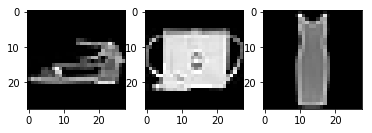

In [16]:
x_reshape=trdata.reshape([-1,28,28,1])
import matplotlib.pyplot as plt
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
ax1.imshow(x_reshape[59997][:,:,0],cmap='gray')
ax2.imshow(x_reshape[59998][:,:,0],cmap='gray')
ax3.imshow(x_reshape[59999][:,:,0],cmap='gray')

#### B. Graph of actual testing data
x-axis:label ,y-axis:number of records with the label

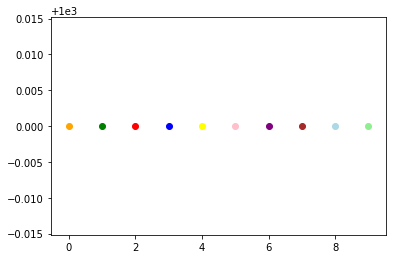

In [26]:
x=trdata
y=trlabel
x_test=testdata
y_test=testlabel
i0=np.array(np.where(y_test==0))
i1=np.array(np.where(y_test==1))
i2=np.array(np.where(y_test==2))
i3=np.array(np.where(y_test==3))
i4=np.array(np.where(y_test==4))
i5=np.array(np.where(y_test==5))
i6=np.array(np.where(y_test==6))
i7=np.array(np.where(y_test==7))
i8=np.array(np.where(y_test==8))
i9=np.array(np.where(y_test==9))
plt.scatter(1,i1.size,c='green')
plt.scatter(2,i2.size,c='red')
plt.scatter(3,i3.size,c='blue')
plt.scatter(4,i4.size,c='yellow')
plt.scatter(5,i5.size,c='pink')
plt.scatter(6,i6.size,c='purple')
plt.scatter(7,i7.size,c='brown')
plt.scatter(8,i8.size,c='lightblue')
plt.scatter(9,i9.size,c='lightgreen')
plt.scatter(0,i0.size,c='orange')
plt.show()

#### C. Graph of predicted output by K-Nearest Neighbour Classifier
x-axis:label ,y-axis:number of records with the label

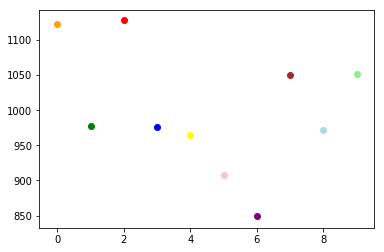

In [22]:
i0=np.array(np.where(predicted_output==0))
i1=np.array(np.where(predicted_output==1))
i2=np.array(np.where(predicted_output==2))
i3=np.array(np.where(predicted_output==3))
i4=np.array(np.where(predicted_output==4))
i5=np.array(np.where(predicted_output==5))
i6=np.array(np.where(predicted_output==6))
i7=np.array(np.where(predicted_output==7))
i8=np.array(np.where(predicted_output==8))
i9=np.array(np.where(predicted_output==9))
plt.scatter(1,i1.size,c='green')
plt.scatter(2,i2.size,c='red')
plt.scatter(3,i3.size,c='blue')
plt.scatter(4,i4.size,c='yellow')
plt.scatter(5,i5.size,c='pink')
plt.scatter(6,i6.size,c='purple')
plt.scatter(7,i7.size,c='brown')
plt.scatter(8,i8.size,c='lightblue')
plt.scatter(9,i9.size,c='lightgreen')
plt.scatter(0,i0.size,c='orange')
plt.show()

#### D. Graph of predicted output by SVM.SVC Classifier
x-axis:label ,y-axis:number of records with the label

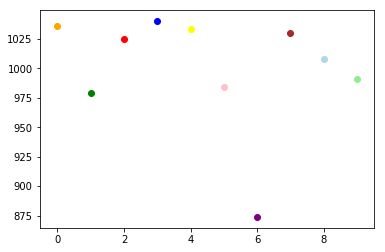

In [24]:
i0=np.array(np.where(predicted_y==0))
i1=np.array(np.where(predicted_y==1))
i2=np.array(np.where(predicted_y==2))
i3=np.array(np.where(predicted_y==3))
i4=np.array(np.where(predicted_y==4))
i5=np.array(np.where(predicted_y==5))
i6=np.array(np.where(predicted_y==6))
i7=np.array(np.where(predicted_y==7))
i8=np.array(np.where(predicted_y==8))
i9=np.array(np.where(predicted_y==9))
plt.scatter(1,i1.size,c='green')
plt.scatter(2,i2.size,c='red')
plt.scatter(3,i3.size,c='blue')
plt.scatter(4,i4.size,c='yellow')
plt.scatter(5,i5.size,c='pink')
plt.scatter(6,i6.size,c='purple')
plt.scatter(7,i7.size,c='brown')
plt.scatter(8,i8.size,c='lightblue')
plt.scatter(9,i9.size,c='lightgreen')
plt.scatter(0,i0.size,c='orange')
plt.show()

### 5.Benchmark result with the reported techniques/Observation and comments on the implementation/Suggestions to improve the system if given more time.
From the classifiers that we have train, it seems that we can get around 85 to 90% of accuracy for the prediction of the Mnist datasets by using a simple classifier without much modification.However, it takes quite some time for the classifiers to be trained. Moreover, all the classifiers actually did quite a poor job in recognizing the shirts that are in the datasets.From the graph that we plot,we have seen that the number of predicted datas that prediceted as shirts are the lowest.Besides, the classifiers often predicted wrongly an image as T-shirt.From the graph plotted,the numbers of t-shirt predicted are always much more that the others image.This means that most of the wrongly predicted image was predicted as a t-shirt.However,repetitions are not done during the training proceudre of the classifiers,therefore,the average accuracy might be slightly lower than the above.A simple neural network was build but the accuracy was not that high as compared to the others.Visualizations are just simply basic from I have done.It shows the sample images,and difference between the number of different image of predicted data and the actual data.

By comparing to the current industry benchmark that are using the same classifier,the classifier trained above have a slightly lower accuray compared to the others.My accuracy for the K-nearest Neighbour for p=1(manhattan distance),uniform weight and number of nearest neighbour equals to 5 is 86.23% and was slightly higher than the benchmark given on github which is 85.9%,however, the benchmark was done using repetition of 2,therefore if the repetition was done during the training,the average accuracy might be slightly lower.My accuracy of the SVM.SVC with c=10 and rbf kernel was 87.16% which is actually much more lower than the benchmark on github which is 89.6%.

If given more time,the classifier can be improve by trying to use different parameters to do the classification such as kernel with polynomials,euclidean distance and etc.Moreover, different model of classification can also be tried during the time given such as RandomForestClassifier.Besides,different kind of visualizations can be tried such as 3d visualization of the data using tensorboard.Lastly,classifier with neural networks can be done with different activation function, adding more layers and more complicated neural network to be build to reduce the loss and to improve the accuracy of the predicted datas.
